In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()
x = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['MedHouseVal'])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [7]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 798.9149 - mae: 11.8961 - val_loss: 3.1053 - val_mae: 1.0833
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.6622 - mae: 1.2301 - val_loss: 1.7563 - val_mae: 0.8784
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.5064 - mae: 0.8813 - val_loss: 13.2983 - val_mae: 2.6356
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0931 - mae: 1.0308 - val_loss: 0.8994 - val_mae: 0.7099
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9151 - mae: 0.7468 - val_loss: 0.7771 - val_mae: 0.6665
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8457 - mae: 0.7105 - val_loss: 1.2301 - val_mae: 0.7691
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8579 - mae: 0.7077 - val_loss: 0.9848 - val_mae: 0.8100
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0691 - mae: 0.7625 - val_loss: 1.0025 - val_mae: 0.8125
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step 

In [8]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7305 - mae: 0.7058
Test MAE: 0.7085


In [9]:
predictions = model.predict(x_test).flatten()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


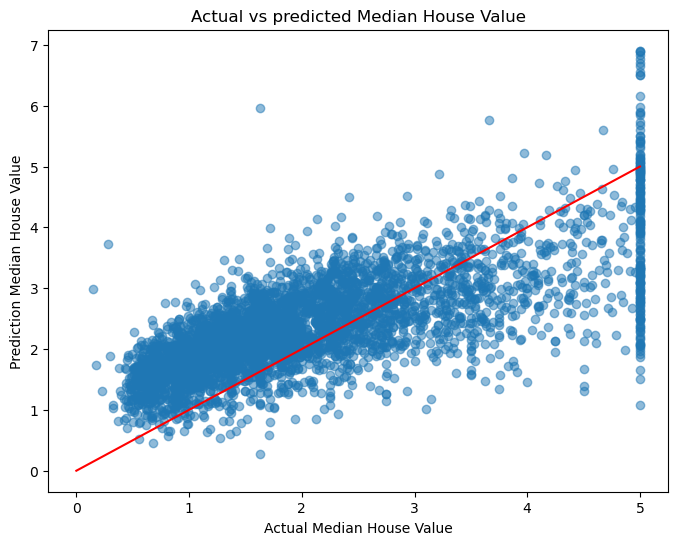

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Prediction Median House Value')
plt.title('Actual vs predicted Median House Value')
plt.plot([0,5], [0,5], color='red')
plt.show()